In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


from sklearn.datasets import make_circles, make_regression

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV  # este es random

In [45]:
training = pd.read_csv('CSV resultados/Filtrado.csv')
testing = pd.read_csv('CSV resultados/Testfiltrado.csv')


In [11]:
training.head()

,CPU,RAM (GB),Storage,GPU,Price (Sonic Rings),CPULabel,StorageLabel,GPULabel
0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,11912523.48,59,3,52
1,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,7993374.48,57,1,46
2,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,5112900.00,68,16,48
3,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,22563005.40,78,28,8
4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,16037611.20,61,16,53


In [12]:
testing.head()

,CPU,RAM (GB),Storage,GPU,CPULabel,StorageLabel,GPULabel
0,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,41,6,26
1,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,43,11,39
2,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,41,19,26
3,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,27,1,22
4,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,2,10,4


In [13]:
X = training.drop(['Price (Sonic Rings)', 'CPU', 'Storage', 'GPU'], axis=1)
y = training['Price (Sonic Rings)']

Trainorder = pd.concat([X, y], axis=1)

In [26]:
XFinal = testing.drop(['CPU', 'Storage', 'GPU'], axis=1)



In [27]:
Trainorder.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel,Price (Sonic Rings)
0,8,59,3,52,11912523.48
1,8,57,1,46,7993374.48
2,8,68,16,48,5112900.00
3,16,78,28,8,22563005.40
4,8,61,16,53,16037611.20


In [28]:

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [29]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(781, 4) (196, 4) (781,) (196,)


In [30]:
X_train.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
680,8,70,16,68
740,8,89,4,66
33,16,98,28,55
31,2,19,22,11
730,16,84,4,72


In [31]:
y_train

680     8873326.80
740    10732644.00
33     16619148.00
31      1769508.00
730    17206020.00
192     8891110.80
314     2445300.00
825     4437108.00
235     7993908.00
305     3201031.08
896     8260668.00
846     5468580.00
109    13160160.00
545     6273306.00
77      7602660.00
926    14671800.00
880    15116400.00
82      7647120.00
215     8286276.96
327     9335710.80
852     7691580.00
377     2747628.00
924    16227900.00
371     3787992.00
2       5112900.00
101     3103308.00
736    21509748.00
758    25511059.08
259    15107508.00
208    12884508.00
266    13329108.00
5       3556800.00
54      3414528.00
843     6348799.08
851    16885908.00
513    10841482.08
440     4614948.00
97      4312620.00
845     6571188.00
204    27165060.00
501     5504059.08
677     4401540.00
937    10661508.00
522    11379359.16
780    31911609.60
848    20247084.00
25      3722546.88
84      3512340.00
10      3502558.80
394     6925712.04
359    12688884.00
963    15916680.00
796     2658

In [39]:
linear = LinearRegression()

linear.fit(X, y)

yFinal = linear.predict(XFinal)


print (yFinal)

[ 4813180.56502446 13531880.37708011 10616638.33399727  1979235.08191869
  2441078.67230258  2810917.99559279  3457782.48400598  3192050.97552137
  5806936.94463855  6639119.49768585  5896590.32272268  5382443.90181078
  6378436.46195705  1161667.95493689  1277169.1606053   5879009.99877738
  6176573.79516037  6176573.79516037  6716863.41713858  4463255.68731339
 13531880.37708011  7548546.33081269  6526460.43671232  6176573.79516037
  2031212.6864934   3755346.28038898  1979235.08191869  2909152.4723161
  3108481.79197578  6370182.38239393  6476997.95775643  3509760.0885807
  6448216.8778864   3755346.28038898  3108481.79197578  6321065.14403228
  3509760.0885807   5879009.99877738  2862895.60016751 14574438.60693288
  5879009.99877738  6321065.14403228  2293929.429986    5879009.99877738
  6176573.79516037  7017287.57973464  6624108.96391388  3108481.79197578
  3755346.28038898  3755346.28038898  6176573.79516037  6476997.95775643
  3108481.79197578  2467240.09488706  6526460.4367123

In [43]:
FIN = pd.DataFrame(yFinal)


In [44]:
FIN.to_csv('predfinal.csv')

In [33]:
X_train.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
680,8,70,16,68
740,8,89,4,66
33,16,98,28,55
31,2,19,22,11
730,16,84,4,72


In [34]:
X_test.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
199,8,98,16,64
542,8,89,16,48
174,8,76,16,63
764,4,50,25,42
66,4,50,25,5


In [35]:
XFinal.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
0,6,41,6,26
1,16,43,11,39
2,12,41,19,26
3,4,27,1,22
4,6,2,10,4


In [36]:
yFinal = linear.predict(XFinal)

In [38]:
len(yFinal)

325

In [14]:
train_score=linear.score(X_train, y_train)
test_score=linear.score(X_test, y_test)

print ('Train: ',train_score)
print('Test: ', test_score)

Train:  0.6651281857582616
Test:  0.5265483434996318


In [15]:
from sklearn.metrics import mean_squared_error

train_sme = mean_squared_error(y_train, y_train_pred)
test_sme = mean_squared_error(y_test, y_test_pred)

print("SME for training set:", train_sme)
print("SME for testing set:", test_sme)

SME for training set: 13592042797171.273
SME for testing set: 17117744777506.572


In [13]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("MAE for training set:", train_mae)
print("MAE for testing set:", test_mae)

MAE for training set: 2725619.6846236293
MAE for testing set: 2996578.6173719666


In [48]:
training2 = pd.read_csv('CSV resultados/Filtra2.csv')

In [49]:
training2.head()

,Screen Size (In.),RAM (GB),Weight (Kg),Price (Sonic Rings),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,13.3,8,1.37,11912523.48,2,5,24,59,3,52
1,13.3,8,1.34,7993374.48,2,5,2,57,1,46
2,15.6,8,1.86,5112900.00,8,4,9,68,16,48
3,15.4,16,1.83,22563005.40,2,5,26,78,28,8
4,13.3,8,1.37,16037611.20,2,5,24,61,16,53


In [56]:
X2 = training2.drop(['Price (Sonic Rings)'], axis=1)
y2 = training2['Price (Sonic Rings)']

Trainorder2 = pd.concat([X2, y2], axis=1)

In [57]:
Trainorder2.head()

,Screen Size (In.),RAM (GB),Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel,Price (Sonic Rings)
0,13.3,8,1.37,2,5,24,59,3,52,11912523.48
1,13.3,8,1.34,2,5,2,57,1,46,7993374.48
2,15.6,8,1.86,8,4,9,68,16,48,5112900.00
3,15.4,16,1.83,2,5,26,78,28,8,22563005.40
4,13.3,8,1.37,2,5,24,61,16,53,16037611.20


In [58]:
X2_train, X2_test, y2_train, y2_test = tts(X2, y2, test_size=0.2, random_state=42)

In [60]:
print (X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(781, 9) (196, 9) (781,) (196,)


In [61]:
linear = LinearRegression()

linear.fit(X2_train, y2_train)

y2_train_pred = linear.predict(X2_train)


print (y2_train_pred)

[10098432.34542853  9876943.15237716 20705307.02615987   721848.19613743
 16437923.41099132 14015286.42661873  4912749.60908894  7295706.74287478
 15703957.9279453   6462643.02476931 10273887.48774159  7319250.96282307
 11592974.8174267   4741847.75998567  9771864.79937758 12646016.66394607
  5651110.32776035 10268140.53452461 10117520.94853478 10505427.0561648
  8066356.91888303  3586712.11205032 10481346.62981772   482468.82564555
  9214622.33333141  3177983.23597651 20024999.16452587 18943804.77677471
 11577110.38933646 11557258.10835539 10671206.28113408  1751472.38274051
  3925454.05022057  7757600.53838405 16053569.54754209 15264463.86616443
  4623580.37346659  3956628.89127681  5381595.10446625 20044415.58179601
  6815983.79624074 11253896.58086868 10344166.13315957  9748268.2163851
 31225490.00004686  8951254.16725847  3925236.12367101   828560.70485326
  5839831.51891917  9083241.06510187  9557595.83381156 13229927.81657648
  4138238.65999248 13201693.06159502 11387088.9965218

In [63]:
train_score2=linear.score(X2_train, y2_train)

print ('Train: ',train_score2)


Train:  0.6899537162701825


In [65]:
from sklearn.metrics import mean_squared_error

train_sme2 = mean_squared_error(y2_train, y2_train_pred)


print("SME for training set:", train_sme2)


SME for training set: 12584404474595.318


In [67]:
from sklearn.metrics import mean_absolute_error

train_mae2 = mean_absolute_error(y2_train, y2_train_pred)


print("MAE for training set:", train_mae2)


MAE for training set: 2615468.8463288634


In [73]:
X2.head()

,Screen Size (In.),RAM (GB),Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,13.3,8,1.37,2,5,24,59,3,52
1,13.3,8,1.34,2,5,2,57,1,46
2,15.6,8,1.86,8,4,9,68,16,48
3,15.4,16,1.83,2,5,26,78,28,8
4,13.3,8,1.37,2,5,24,61,16,53


In [76]:
y2.head(5)

0    11912523.48
1     7993374.48
2     5112900.00
3    22563005.40
4    16037611.20
Name: Price (Sonic Rings), dtype: float64

In [78]:
XFinal.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
0,6,41,6,26
1,16,43,11,39
2,12,41,19,26
3,4,27,1,22
4,6,2,10,4


In [84]:
testing2 = pd.read_csv('CSV resultados/Testfiltra2.csv')


In [85]:
testing2.head()

,Screen Size (In.),RAM (GB),Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,15.6,6,2.04,6,4,1,41,6,26
1,17.3,16,2.99,3,2,6,43,11,39
2,15.6,12,2.19,4,1,9,41,19,26
3,13.3,4,1.20,11,4,6,27,1,22
4,15.6,6,2.20,7,4,6,2,10,4


In [86]:
XFinal2=testing2

In [87]:
linear = LinearRegression()

linear.fit(X2, y2)

y2Final = linear.predict(XFinal2)


print (y2Final)

[ 4058342.31983968 11723595.14341456  8939644.35950106  3083053.69420272
  2377396.3661656   2075499.51476133  3793799.05310904  2107959.33891348
  5505455.65598655  6413349.98486596  5142535.03968838  5539729.05099347
  6382411.46039561   993306.52074411   751133.10810834  5810672.67054681
  5352838.87637125  7192463.65100401  7507525.01646478  3049688.62909879
 12327064.18663032  7762874.02816673  5710419.30551157  6883602.46598211
  1309747.62110132  3381783.41508835  3083053.69420272  2585681.84383731
  3534097.7409504   6778344.50039597  6697566.65760403  3156728.11403547
  5571928.08457137  4731405.266797    3179012.25936781  6816438.55289621
  3444323.65545881  6620847.6422621   2064788.7535231  13561140.82032119
  6909807.42937575  6351595.59268733   866135.68973676  7171793.80068529
  6709837.23031403  7192688.31992038  5849946.52012261  3857797.03838293
  3887969.10159971  3615988.73272794  7535205.55071625  5555457.96643609
  2904033.80499255  1270818.57470798  5283034.08568

In [88]:
FIN2 = pd.DataFrame(y2Final)
FIN2.to_csv('predfinal2.csv')

In [ ]:
'''from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)


y_train_pred = logistic.predict(X_train)
y_test_pred = logistic.predict(X_test)


print("Training set predictions:", y_train_pred)
print("Testing set predictions:", y_test_pred)'''

In [ ]:
#Let´s try PCA

'''Trainorder.info()'''

In [24]:
'''from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion

from sklearn.decomposition import PCA    # PCA


data_n_mano = (Trainorder - Trainorder.mean())/Trainorder.std()

data_n = StandardScaler().fit_transform(Trainorder)

np.sum(data_n_mano - data_n)'''

RAM (GB)              -2.113587e-14
CPULabel              -2.442491e-15
StorageLabel          -2.142730e-14
GPULabel               2.983724e-16
Price (Sonic Rings)   -1.339207e-15
dtype: float64

In [25]:
'''data_mm_mano=(Trainorder - np.min(Trainorder))/(np.max(Trainorder) - np.min(Trainorder))

data_mm=MinMaxScaler().fit_transform(Trainorder)

np.sum(data_mm_mano - data_mm)'''

RAM (GB)              -212.599864
CPULabel              -655.827302
StorageLabel          -404.856882
GPULabel              -490.834174
Price (Sonic Rings)     25.875571
dtype: float64

In [26]:
'''TrainorderSt = StandardScaler().fit_transform(Trainorder)'''

In [27]:
'''pca = PCA()

pca.fit(TrainorderSt)

print(TrainorderSt.shape)

pca.explained_variance_ratio_'''

(977, 5)


array([0.51865072, 0.21124858, 0.12566584, 0.09871006, 0.04572479])

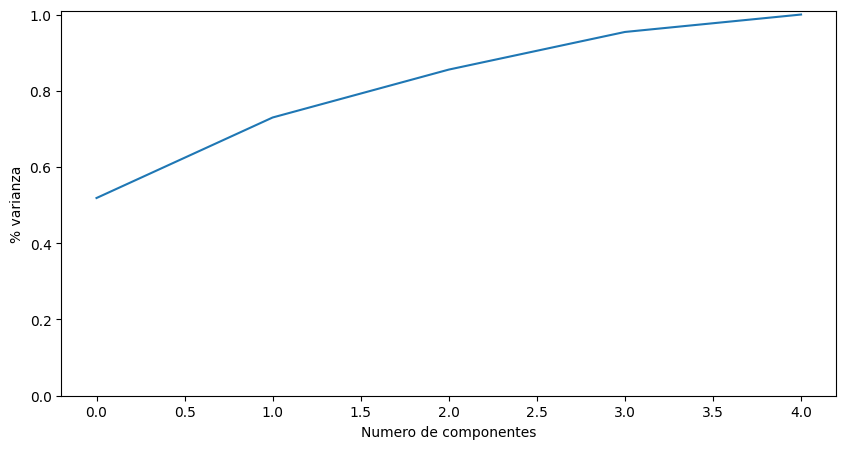

In [28]:
'''plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);'''

In [31]:
'''pca = PCA(n_components=4)

Trainorder_pca=pca.fit_transform(TrainorderSt)


df=pd.DataFrame(Trainorder_pca)

df.head()
'''

,0,1,2,3
0,-0.365685,-1.250986,0.747804,0.715709
1,-0.913870,-1.415763,0.887600,0.583709
2,-0.578597,0.013969,-0.239214,-0.074185
3,1.424705,2.539713,1.960882,-0.674280
4,0.334680,0.225533,0.149588,0.566245


In [32]:
'''sum(pca.explained_variance_ratio_)'''

0.9542752109872263

In [33]:
'''pd.DataFrame(TrainorderSt).head()'''

,0,1,2,3,4
0,-0.105737,-0.537373,-1.596889,0.111811,0.300407
1,-0.105737,-0.623469,-1.852318,-0.183963,-0.321364
2,-0.105737,-0.149941,0.063400,-0.085372,-0.778350
3,1.495888,0.280539,1.595974,-2.057197,1.990101
4,-0.105737,-0.451277,0.063400,0.161106,0.954851


In [34]:
'''pd.DataFrame(pca.inverse_transform(df)).head()'''

,0,1,2,3,4
0,0.172114,-0.504752,-1.570478,0.137562,-0.020501
1,-0.105360,-0.623425,-1.852282,-0.183928,-0.321799
2,-0.432851,-0.188345,0.032306,-0.115688,-0.400544
3,1.837753,0.320675,1.628470,-2.025513,1.595259
4,0.418743,-0.389701,0.113254,0.209715,0.349094


In [35]:
'''from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import f1_score as f1'''

In [40]:
'''# CON PCA

X_norm = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)

X_norm = pca.fit_transform(X_norm)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)
f1(y_test, y_pred)'''

ValueError: Unknown label type: 'continuous'